Epoch [0/2000], Loss: 589.045959
Epoch [200/2000], Loss: 106.786552
Epoch [400/2000], Loss: 2.533270
Epoch [600/2000], Loss: 1.221009
Epoch [800/2000], Loss: 0.874820
Epoch [1000/2000], Loss: 0.740864
Epoch [1200/2000], Loss: 0.691486
Epoch [1400/2000], Loss: 0.691486
Epoch [1600/2000], Loss: 0.692705
Epoch [1800/2000], Loss: 0.691762
Test Loss: 1.914770

Name: MEENAKSHI R
Register Number: 212224220062


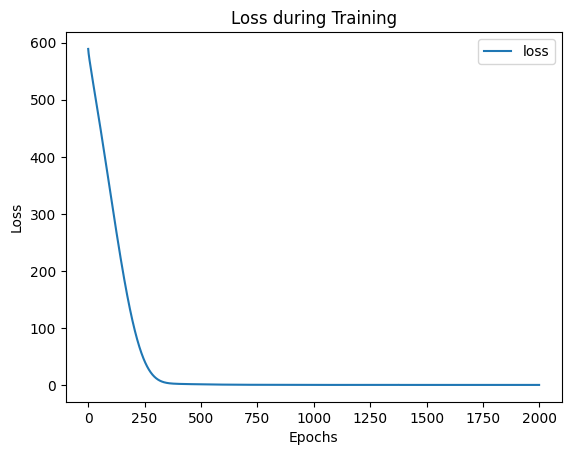

Name: MEENAKSHI R
Register Number:212224220062
Prediction: 25.77292251586914


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

dataset1 = pd.read_csv('sample.csv')
X = dataset1[['Input']].values
y = dataset1[['Output']].values

dataset1.head(5)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=33)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

# Name: MEENAKSHI R
# Register Number: 212224220062
class NeuralNet(nn.Module):
  def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(1,8)
        self.fc2 = nn.Linear(8,10)
        self.fc3 = nn.Linear(10,1)
        self.relu = nn.ReLU()
        self.history = {'loss': []}

  def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize the Model, Loss Function, and Optimizer
MEENAKSHI = NeuralNet()
criterion = nn.MSELoss()
optimizer = optim.RMSprop(MEENAKSHI.parameters(), lr=0.001)

# Name: MEENAKSHI R
# Register Number: 212224220062
def train_model(MEENAKSHI, X_train, y_train, criterion, optimizer, epochs=2000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        loss = criterion(MEENAKSHI(X_train), y_train)
        loss.backward()
        optimizer.step()


        # Append loss inside the loop
        MEENAKSHI.history['loss'].append(loss.item())

        if epoch % 200 == 0:
            print(f'Epoch [{epoch}/{epochs}], Loss: {loss.item():.6f}')


train_model(MEENAKSHI, X_train_tensor, y_train_tensor, criterion, optimizer)

with torch.no_grad():
    test_loss = criterion(MEENAKSHI(X_test_tensor), y_test_tensor)
    print(f'Test Loss: {test_loss.item():.6f}')

loss_df = pd.DataFrame(MEENAKSHI.history)

import matplotlib.pyplot as plt
print("\nName: MEENAKSHI R")
print("Register Number: 212224220062")
loss_df.plot()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss during Training")
plt.show()

X_n1_1 = torch.tensor([[9]], dtype=torch.float32)
prediction = MEENAKSHI(torch.tensor(scaler.transform(X_n1_1), dtype=torch.float32)).item()
print("Name: MEENAKSHI R")
print("Register Number:212224220062")
print(f'Prediction: {prediction}')
